In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sherlock-holmes-ebook/The Adventures of Sherlock Holmes.txt


## Problem Statement

In [2]:
# Natural Language Processing (NLP) plays a crucial role in predictive text systems, chatbots, and virtual assistants.
# Next Word Prediction is a fundamental NLP task where a model predicts the most probable next word based on a given input text.
# The objective of this project is to develop a deep learning model using LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Unit) to predict the next word in a sequence, improving text generation and user typing assistance.

## Import libraries

In [3]:
import re
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
import matplotlib.pyplot as plt

2025-10-12 13:38:41.279666: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760276321.468987      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760276321.531574      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load the dataset

In [4]:
file_path = '/kaggle/input/sherlock-holmes-ebook/The Adventures of Sherlock Holmes.txt'

# Open and read the file
with open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()

print(text[:5000])

﻿To Sherlock Holmes she is always _the_ woman. I have seldom heard him
mention her under any other name. In his eyes she eclipses and
predominates the whole of her sex. It was not that he felt any emotion
akin to love for Irene Adler. All emotions, and that one particularly,
were abhorrent to his cold, precise but admirably balanced mind. He
was, I take it, the most perfect reasoning and observing machine that
the world has seen, but as a lover he would have placed himself in a
false position. He never spoke of the softer passions, save with a gibe
and a sneer. They were admirable things for the observer—excellent for
drawing the veil from men’s motives and actions. But for the trained
reasoner to admit such intrusions into his own delicate and finely
adjusted temperament was to introduce a distracting factor which might
throw a doubt upon all his mental results. Grit in a sensitive
instrument, or a crack in one of his own high-power lenses, would not
be more disturbing than a strong e

In [5]:
text[:5000]

'\ufeffTo Sherlock Holmes she is always _the_ woman. I have seldom heard him\nmention her under any other name. In his eyes she eclipses and\npredominates the whole of her sex. It was not that he felt any emotion\nakin to love for Irene Adler. All emotions, and that one particularly,\nwere abhorrent to his cold, precise but admirably balanced mind. He\nwas, I take it, the most perfect reasoning and observing machine that\nthe world has seen, but as a lover he would have placed himself in a\nfalse position. He never spoke of the softer passions, save with a gibe\nand a sneer. They were admirable things for the observer—excellent for\ndrawing the veil from men’s motives and actions. But for the trained\nreasoner to admit such intrusions into his own delicate and finely\nadjusted temperament was to introduce a distracting factor which might\nthrow a doubt upon all his mental results. Grit in a sensitive\ninstrument, or a crack in one of his own high-power lenses, would not\nbe more distur

## Data Preprocessing

In [6]:
# Clean the text
def clean_text(text):
    text = text.replace('\ufeff', '')
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, punctuation
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

In [7]:
cleaned_text = clean_text(text)

In [8]:
cleaned_text[:5000]

'to sherlock holmes she is always the woman i have seldom heard him\nmention her under any other name in his eyes she eclipses and\npredominates the whole of her sex it was not that he felt any emotion\nakin to love for irene adler all emotions and that one particularly\nwere abhorrent to his cold precise but admirably balanced mind he\nwas i take it the most perfect reasoning and observing machine that\nthe world has seen but as a lover he would have placed himself in a\nfalse position he never spoke of the softer passions save with a gibe\nand a sneer they were admirable things for the observerexcellent for\ndrawing the veil from mens motives and actions but for the trained\nreasoner to admit such intrusions into his own delicate and finely\nadjusted temperament was to introduce a distracting factor which might\nthrow a doubt upon all his mental results grit in a sensitive\ninstrument or a crack in one of his own highpower lenses would not\nbe more disturbing than a strong emotion in

In [9]:
#Tokenize the text to convert words to integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts([cleaned_text])
tokenizer.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'to': 4,
 'of': 5,
 'a': 6,
 'in': 7,
 'that': 8,
 'it': 9,
 'you': 10,
 'he': 11,
 'was': 12,
 'his': 13,
 'is': 14,
 'my': 15,
 'have': 16,
 'with': 17,
 'as': 18,
 'had': 19,
 'at': 20,
 'which': 21,
 'for': 22,
 'not': 23,
 'but': 24,
 'be': 25,
 'me': 26,
 'we': 27,
 'this': 28,
 'from': 29,
 'there': 30,
 'said': 31,
 'upon': 32,
 'holmes': 33,
 'so': 34,
 'him': 35,
 'her': 36,
 'she': 37,
 'your': 38,
 'all': 39,
 'very': 40,
 'no': 41,
 'been': 42,
 'on': 43,
 'what': 44,
 'one': 45,
 'by': 46,
 'then': 47,
 'are': 48,
 'were': 49,
 'an': 50,
 'would': 51,
 'when': 52,
 'out': 53,
 'up': 54,
 'do': 55,
 'man': 56,
 'could': 57,
 'has': 58,
 'if': 59,
 'into': 60,
 'who': 61,
 'mr': 62,
 'or': 63,
 'little': 64,
 'will': 65,
 'some': 66,
 'now': 67,
 'see': 68,
 'down': 69,
 'our': 70,
 'should': 71,
 'may': 72,
 'they': 73,
 'us': 74,
 'well': 75,
 'am': 76,
 'over': 77,
 'can': 78,
 'about': 79,
 'more': 80,
 'think': 81,
 'must': 82,
 'shall':

In [10]:
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

Vocabulary size: 8574


In [11]:
tokenizer.index_word[100]

'here'

In [12]:
# Create input sequences
input_sequences = []
#sentences = cleaned_text.split('\n')
sentences = [s for s in cleaned_text.split('\n') if s.strip()]

for sentence in sentences:
  #print(sentence)
  tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]
  #print(tokenized_sentence)
  if len(tokenized_sentence) > 1:
      for i in range(1,len(tokenized_sentence)):
          n_gram_sequence = tokenized_sentence[:i+1]
          #print(n_gram_sequence)
          input_sequences.append(tokenized_sentence[:i+1])

In [13]:
print("Number of sequences:", len(input_sequences))

Number of sequences: 97577


In [14]:
sentences[:10]

['to sherlock holmes she is always the woman i have seldom heard him',
 'mention her under any other name in his eyes she eclipses and',
 'predominates the whole of her sex it was not that he felt any emotion',
 'akin to love for irene adler all emotions and that one particularly',
 'were abhorrent to his cold precise but admirably balanced mind he',
 'was i take it the most perfect reasoning and observing machine that',
 'the world has seen but as a lover he would have placed himself in a',
 'false position he never spoke of the softer passions save with a gibe',
 'and a sneer they were admirable things for the observerexcellent for',
 'drawing the veil from mens motives and actions but for the trained']

In [15]:
input_sequences[:25]

[[4, 129],
 [4, 129, 33],
 [4, 129, 33, 37],
 [4, 129, 33, 37, 14],
 [4, 129, 33, 37, 14, 215],
 [4, 129, 33, 37, 14, 215, 1],
 [4, 129, 33, 37, 14, 215, 1, 214],
 [4, 129, 33, 37, 14, 215, 1, 214, 3],
 [4, 129, 33, 37, 14, 215, 1, 214, 3, 16],
 [4, 129, 33, 37, 14, 215, 1, 214, 3, 16, 1569],
 [4, 129, 33, 37, 14, 215, 1, 214, 3, 16, 1569, 111],
 [4, 129, 33, 37, 14, 215, 1, 214, 3, 16, 1569, 111, 35],
 [3212, 36],
 [3212, 36, 251],
 [3212, 36, 251, 86],
 [3212, 36, 251, 86, 87],
 [3212, 36, 251, 86, 87, 204],
 [3212, 36, 251, 86, 87, 204, 7],
 [3212, 36, 251, 86, 87, 204, 7, 13],
 [3212, 36, 251, 86, 87, 204, 7, 13, 141],
 [3212, 36, 251, 86, 87, 204, 7, 13, 141, 37],
 [3212, 36, 251, 86, 87, 204, 7, 13, 141, 37, 4542],
 [3212, 36, 251, 86, 87, 204, 7, 13, 141, 37, 4542, 2],
 [4543, 1],
 [4543, 1, 263]]

In [16]:
sample_sentence = sentences[0]
tokenized_sentence = tokenizer.texts_to_sequences([sample_sentence])[0]
print(sample_sentence)
print(tokenized_sentence)

to sherlock holmes she is always the woman i have seldom heard him
[4, 129, 33, 37, 14, 215, 1, 214, 3, 16, 1569, 111, 35]


In [17]:
# maximum sentence length
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)

18


In [18]:
# Padding sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [19]:
input_sequences[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   4, 129], dtype=int32)

In [20]:
# Features and labels
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [21]:
X

array([[   0,    0,    0, ...,    0,    0,    4],
       [   0,    0,    0, ...,    0,    4,  129],
       [   0,    0,    0, ...,    4,  129,   33],
       ...,
       [   0,    0,    0, ..., 8573,    4,  337],
       [   0,    0,    0, ...,    4,  337,   79],
       [   0,    0,    0, ...,  337,   79,  334]], dtype=int32)

In [22]:
y

array([ 129,   33,   37, ...,   79,  334, 1567], dtype=int32)

In [23]:
# convert one-hot-encode
y = np.array(tf.keras.utils.to_categorical(y, num_classes=vocab_size))

In [24]:
y[5]

array([0., 1., 0., ..., 0., 0., 0.])

In [25]:
print(X.shape,y.shape)

(97577, 17) (97577, 8574)


## Build the LSTM Model

In [26]:
EMB_DIM = 100

model = Sequential()
model.add(Embedding(vocab_size, EMB_DIM, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(vocab_size, activation='softmax'))
model.build(input_shape=(None,max_sequence_len-1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1760276338.826106      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 17, 100)        │       857,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 150)            │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        19,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8574)           │     1,106,046 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,133,374 (8.14 MB)

 Trainable params: 2,133,374 (8.14 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
history = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100


I0000 00:00:1760276352.714669      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


3050/3050 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - accuracy: 0.0554 - loss: 6.5763
Epoch 2/100
3050/3050 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.0951 - loss: 5.8879
Epoch 3/100
3050/3050 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.1189 - loss: 5.5807
Epoch 4/100
3050/3050 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.1314 - loss: 5.3682
Epoch 5/100
3050/3050 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.1449 - loss: 5.1603
Epoch 6/100
3050/3050 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.1510 - loss: 5.0355
Epoch 7/100
3050/3050 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.1589 - loss: 4.8872
Epoch 8/100
3050/3050 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.1656 - loss: 4.7613
Epoch 9/100
3050/3050 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.1730 - loss: 4.6470
Epoch 10/100
3050/3050 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.1844 - loss: 4.5113
Epoch 11/100
3050/3050 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.1889 - loss: 4.4127
Epoch 12/100
3050/30

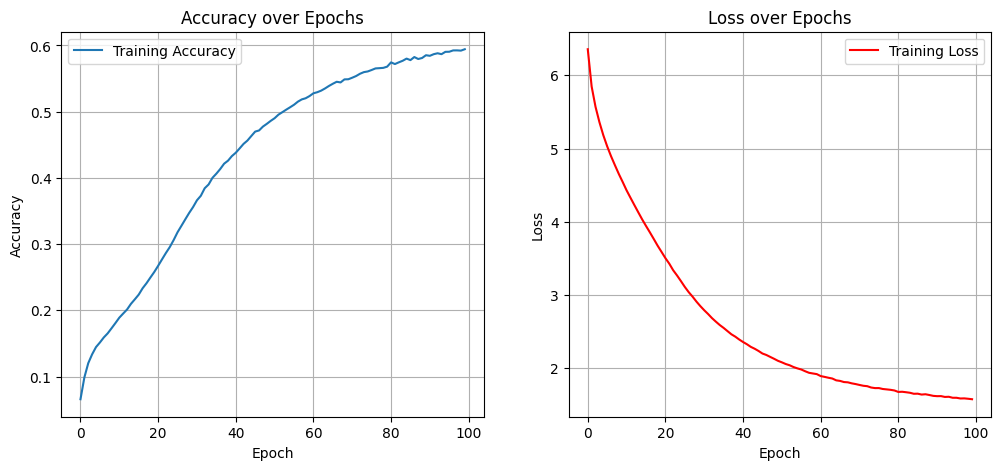

In [28]:
# Plot training accuracy and loss
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

In [29]:
def generate_text(seed_text, next_words=30):
    text = seed_text
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predictions = model.predict(token_list, verbose=0)[0]
        
        # Pick the most likely next word
        predicted = np.argmax(predictions)
        
        output_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
                
        text += ' ' + output_word
    return text

seed_text = "sherlock holmes looked"
generated = generate_text(seed_text, next_words=5)
print("Generated text:\n", generated)

Generated text:
 sherlock holmes looked deeply chagrined he drew a


## Save the model

In [31]:
model.save('/kaggle/working/next_word_model.h5')

In [32]:
import pickle

# Save tokenizer
with open('/kaggle/working/tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)